In this exam you will work with the weather dataset. Let's start with loading the dataset.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
weather = pd.read_csv('weather2.csv')

We also use another dataset that contains information about each weather station.

In [2]:
stations = pd.read_excel('Station Information.xlsx')

1. Examine the shape of the both dataframes

2. Check the top 5 rows of each dataframe to see what they look like 

3. Drop the first column (Unnamed) from weather, then display the top row 

In [3]:
weather.drop('Unnamed: 0',inplace=True,axis = 1)
weather.head()

,station_wban,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,precipitation_1h,precipitation_6h
0,841170-99999,2010.0,1.0,15.0,16.0,270.0,210.0,-9999.0,300.0,51.0,7.0,-9999.0,-9999.0
1,841170-99999,2010.0,1.0,15.0,17.0,270.0,210.0,-9999.0,310.0,57.0,7.0,-9999.0,-9999.0
2,841170-99999,2010.0,1.0,15.0,18.0,276.0,208.0,10115.0,310.0,51.0,7.0,-9999.0,-9999.0
3,841170-99999,2010.0,1.0,15.0,19.0,280.0,220.0,-9999.0,320.0,62.0,7.0,-9999.0,-9999.0
4,841170-99999,2010.0,1.0,15.0,20.0,280.0,220.0,-9999.0,300.0,72.0,7.0,-9999.0,-9999.0


4. Combine ``USAF`` and ``WBAN`` columns of ``stations`` ``DataFrame`` to create a new column named ``station_wban`` that looks like the one in ``weather`` ``DataFrame`` (``USAF_WBAN``) 

In [4]:
stations['station_wban'] = stations['USAF'].astype(str)+'-'+stations['WBAN'].astype(str)
stations.head()

,USAF,WBAN,STATION NAME,CTRY,ST CALL,LAT,LON,ELEV(M),BEGIN,END,station_wban
0,7018,99999,WXPOD 7018,NaN,NaN,0.00,0.000,7018.0,20110309,20130730,7018-99999
1,7026,99999,WXPOD 7026,AF,NaN,0.00,0.000,7026.0,20120713,20170822,7026-99999
2,7070,99999,WXPOD 7070,AF,NaN,0.00,0.000,7070.0,20140923,20150926,7070-99999
3,8260,99999,WXPOD8270,NaN,NaN,0.00,0.000,0.0,20050101,20100920,8260-99999
4,8268,99999,WXPOD8278,AF,NaN,32.95,65.567,1156.7,20100519,20120323,8268-99999


5. Join the 2 ``DataFrame``s to add ``station name``, country (``CTRY``) and state (``ST CALL``) to weather ``DataFrame``. There is no need for the rest of the columns in stations. You should use the proper type of join so that the number of rows in ``weather`` ``DataFrame`` stays the same. At the end of this part, the shape of ``weather`` should be (100000, 16). Check the first row of the result to make sure all values are correct  

In [5]:
weather = pd.merge(weather, stations, how='left', on='station_wban')
weather.head(1)

,station_wban,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,...,USAF,WBAN,STATION NAME,CTRY,ST CALL,LAT,LON,ELEV(M),BEGIN,END
0,841170-99999,2010.0,1.0,15.0,16.0,270.0,210.0,-9999.0,300.0,51.0,...,841170,99999,ELOY ALFARO INTL,EC,SEMT,-0.95,-80.683,14.6,19770701,20200329


In [6]:
weather.drop(['USAF', 'WBAN', 'LAT', 'LON', 'ELEV(M)', 'BEGIN', 'END'], axis=1, inplace=True)
weather.head()

,station_wban,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,precipitation_1h,precipitation_6h,STATION NAME,CTRY,ST CALL
0,841170-99999,2010.0,1.0,15.0,16.0,270.0,210.0,-9999.0,300.0,51.0,7.0,-9999.0,-9999.0,ELOY ALFARO INTL,EC,SEMT
1,841170-99999,2010.0,1.0,15.0,17.0,270.0,210.0,-9999.0,310.0,57.0,7.0,-9999.0,-9999.0,ELOY ALFARO INTL,EC,SEMT
2,841170-99999,2010.0,1.0,15.0,18.0,276.0,208.0,10115.0,310.0,51.0,7.0,-9999.0,-9999.0,ELOY ALFARO INTL,EC,SEMT
3,841170-99999,2010.0,1.0,15.0,19.0,280.0,220.0,-9999.0,320.0,62.0,7.0,-9999.0,-9999.0,ELOY ALFARO INTL,EC,SEMT
4,841170-99999,2010.0,1.0,15.0,20.0,280.0,220.0,-9999.0,300.0,72.0,7.0,-9999.0,-9999.0,ELOY ALFARO INTL,EC,SEMT


6. Show descriptive statistics for all numeric columns of ``weather`` ``DataFrame`` 

7. In all numeric columns, values 9999, -9999, 999, and -999 represent missing values. Replace all of them with np.nan using <a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html' target='blank'>.replace() </a> method of ``DataFrame`` 

In [7]:
weather = weather.replace([9999, -9999, 999,  -999], np.nan)
weather.head()

,station_wban,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,precipitation_1h,precipitation_6h,STATION NAME,CTRY,ST CALL
0,841170-99999,2010.0,1.0,15.0,16.0,270.0,210.0,NaN,300.0,51.0,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT
1,841170-99999,2010.0,1.0,15.0,17.0,270.0,210.0,NaN,310.0,57.0,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT
2,841170-99999,2010.0,1.0,15.0,18.0,276.0,208.0,10115.0,310.0,51.0,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT
3,841170-99999,2010.0,1.0,15.0,19.0,280.0,220.0,NaN,320.0,62.0,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT
4,841170-99999,2010.0,1.0,15.0,20.0,280.0,220.0,NaN,300.0,72.0,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT


8. Run descriptive statistics again to make sure the the values are transformed correctly 

9. All weather meaures are inflated with a factor of 10. For example, 289 for ``temperature`` means 28.9 degrees. Divide all measures by 10. Use ``.apply()`` method and a ``lambda function``. Other columns, such as day and hour should not be affected 

In [8]:
weather['temperature'] = weather['temperature'].apply(lambda x : x/10)
weather.head()

,station_wban,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,precipitation_1h,precipitation_6h,STATION NAME,CTRY,ST CALL
0,841170-99999,2010.0,1.0,15.0,16.0,27.0,210.0,NaN,300.0,51.0,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT
1,841170-99999,2010.0,1.0,15.0,17.0,27.0,210.0,NaN,310.0,57.0,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT
2,841170-99999,2010.0,1.0,15.0,18.0,27.6,208.0,10115.0,310.0,51.0,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT
3,841170-99999,2010.0,1.0,15.0,19.0,28.0,220.0,NaN,320.0,62.0,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT
4,841170-99999,2010.0,1.0,15.0,20.0,28.0,220.0,NaN,300.0,72.0,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT


10. Calculate mean, max, and min values for each measure of weather for each month. In your output, replace month number with month names 

In [9]:
cols = ['temperature','dew_point','pressure','wind_direction','wind_speed','sky_condition','precipitation_1h','precipitation_6h']    
w1 = weather.groupby('month')[cols].aggregate(['mean','max','min'])
w1.index = ['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
w1

temperature               dew_point                    pressure           \
           mean   max   min        mean    max    min          mean      max   
Jan    6.927011  32.0 -28.3   30.432030  262.0 -333.0  10180.833283  10449.0   
Feb    8.038640  32.0 -28.9   27.551687  270.0 -322.0  10174.590040  10445.0   
Mar    8.890249  32.5 -18.9   22.284737  260.0 -267.0  10148.228095  10404.0   
Apr   11.235925  41.0 -12.8   37.529937  260.0 -222.0  10158.711732  10415.0   
May   16.960399  36.0  -1.1  100.945359  260.0  -94.0  10148.055133  10302.0   
Jun   21.231470  42.0   5.0  143.141402  280.0  -50.0  10138.960690  10289.0   
Jul   21.941066  40.6   0.0  166.849215  270.0  -20.0  10161.345973  10311.0   
Aug   22.071835  42.0   0.0  165.501613  270.0  -28.0  10151.368747  10255.0   
Sep   20.016636  36.7  -2.2  145.201874  261.0 -100.0  10153.077897  10303.0   
Oct   13.234213  34.0  -7.8   80.555103  250.0 -120.0  10172.149110  10410.0   
Nov    9.947000  31.0 -11.1   42.963418  260.0 -223.0  10181.565503  10380.0   
Dec    5.306827  32.0 -21.1    3.019390  260.0 -250.0  10184.339681  10407.0   

            wind_direction  ... wind_speed sky_condition            \
        min           mean  ...        min          mean  max  min   
Jan  9837.0     188.031960  ...        0.0      4.151001  9.0  0.0   
Feb  9898.0     188.762929  ...        0.0      4.477293  9.0  0.0   
Mar  9901.0     186.462277  ...        0.0      3.977051  9.0  0.0   
Apr  9937.0     181.424806  ...        0.0      4.214677  9.0  0.0   
May  9924.0     175.931646  ...        0.0      4.949469  9.0  0.0   
Jun  9968.0     179.042592  ...        0.0      4.619005  9.0  0.0   
Jul  9988.0     164.566663  ...        0.0      3.733736  9.0  0.0   
Aug  9983.0     163.499857  ...        0.0      3.493919  9.0  0.0   
Sep  9940.0     165.801439  ...        0.0      3.598177  9.0  0.0   
Oct  9867.0     158.123265  ...        0.0      4.004928  9.0  0.0   
Nov  9879.0     167.842003  ...        0.0      4.298305  9.0  0.0   
Dec  9833.0     174.436303  ...        0.0      4.753292  9.0  0.0   

    precipitation_1h              precipitation_6h               
                mean     max  min             mean     max  min  
Jan         0.804798    99.0 -1.0         7.787267   221.0 -1.0  
Feb         1.496733    99.0 -1.0         9.541748   290.0 -1.0  
Mar         1.361825  2794.0 -1.0         9.546125   292.0 -1.0  
Apr         2.343537   173.0 -1.0        18.674194   279.0 -1.0  
May         3.043375  2690.0 -1.0        18.150000   361.0 -1.0  
Jun         0.783595   180.0 -1.0        17.270115   358.0 -1.0  
Jul         1.000542   246.0 -1.0        13.016204   450.0 -1.0  
Aug         1.215467   267.0 -1.0        26.250000   912.0 -1.0  
Sep         1.433028   559.0 -1.0        31.012618  1278.0 -1.0  
Oct         1.306043   302.0 -1.0        20.127536   699.0 -1.0  
Nov         1.048246   173.0 -1.0        14.904153   417.0 -1.0  
Dec         0.900050    91.0 -1.0        14.350685   274.0 -1.0  

[12 rows x 24 columns]

11. Draw separate histograms for ``temperature``, ``dew point``, ``pressure``, and ``wind speed`` in one figure. Use subplots. Each plot should be labeled using corrosponding measure name. Explain how each distribution is (skewed right, skewed left, normal)

Text(0.5, 1.0, 'Histogram of Wind Speed')

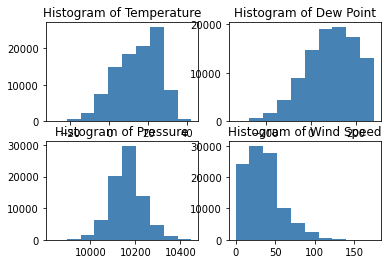

In [10]:
plt.subplot(2,2,1)
plt.hist(weather['temperature'],bins=10,color='steelblue')
plt.title('Histogram of Temperature')
plt.subplot(2,2,2)
plt.hist(weather['dew_point'],bins=10,color='steelblue')
plt.title('Histogram of Dew Point')
plt.subplot(2,2,3)
plt.hist(weather['pressure'],bins=10,color='steelblue')
plt.title('Histogram of Pressure')
plt.subplot(2,2,4)
plt.hist(weather['wind_speed'],bins=10,color='steelblue')
plt.title('Histogram of Wind Speed')

12. Draw a bar chart that shows average ``temperature`` for different months. Replace month number with month name and format month labels in a way that is readable by rotating them 30 degrees 

In [11]:
temp_average = weather.groupby(['month']).aggregate({'temperature':'mean'})
temp_average.index = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Agu','Sep','Oct','Nov','Dec']
temp_average

,temperature
Jan,6.927011
Feb,8.038640
Mar,8.890249
Apr,11.235925
May,16.960399
Jun,21.231470
Jul,21.941066
Agu,22.071835
Sep,20.016636
Oct,13.234213


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

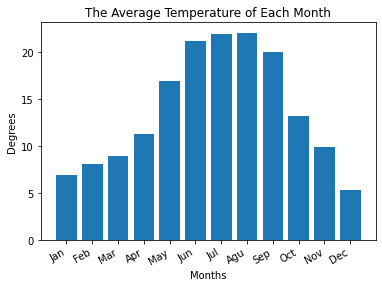

In [12]:
plt.bar(temp_average.index.tolist(),temp_average['temperature'])
plt.title('The Average Temperature of Each Month')
plt.xlabel('Months')
plt.ylabel('Degrees')
plt.xticks(rotation=30,horizontalalignment='right')

13. Plot a line chart that shows average ``temperature`` over time. The x-axis should contain a label for every other year 

In [15]:
temp_year = weather.groupby(['year']).aggregate({'temperature':'mean'})
temp_year

,temperature
year,
1999.0,14.811743
2000.0,11.313909
2001.0,23.763014
2002.0,1.990567
2003.0,17.713370
2004.0,11.568137
2005.0,21.541719
2006.0,9.658583
2007.0,3.006498


(array([1997.5, 2000. , 2002.5, 2005. , 2007.5, 2010. , 2012.5, 2015. ,
        2017.5, 2020. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

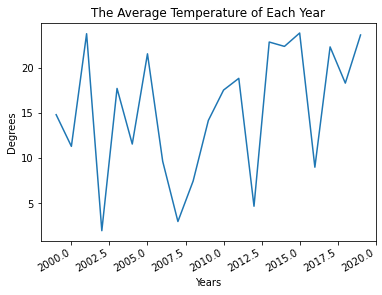

In [16]:
plt.plot(temp_year.index.tolist(), temp_year['temperature'])
plt.title('The Average Temperature of Each Year')
plt.xlabel('Years')
plt.ylabel('Degrees')
plt.xticks(rotation=30,horizontalalignment='right')

14. Select the top 10 stations that have the most number of records. Draw a bar chat that shows the number of records for each of the 10 station 

In [17]:
top_station = weather.groupby(['station_wban']).count()['year'].sort_values(ascending = False)
tstation = pd.DataFrame(top_station.head(10))
tstation

,year
station_wban,
725200-94823,7994
841170-99999,7712
727530-14914,6580
742060-24207,5872
722280-13876,5848
726980-24229,4828
164590-99999,4315
725540-14949,4125
727850-24157,3722


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

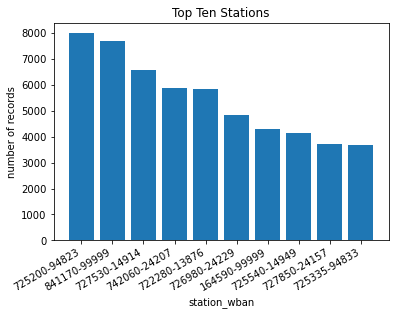

In [18]:
plt.bar(tstation.index.tolist(),tstation['year'])
plt.title('Top Ten Stations')
plt.xlabel('station_wban')
plt.ylabel('number of records')
plt.xticks(rotation=30,horizontalalignment='right')

15. Add a new column named ``season`` which is calculated based on month. Use Jun-Aug for summer, Dec-Feb for winter and so on 

In [19]:
def season (month):
    if month in (6.0,7.0,8.0):
        return 'summer'
    elif month in (9.0, 10.0, 11.0):
        return 'fall'
    elif month in (12.0, 1.0, 2.0):
        return 'winter'
    elif month in (3.0,4.0,5.0):
        return 'spring'

In [20]:
weather['season'] = weather['month'].apply(season)
weather

,station_wban,year,month,day,hour,temperature,dew_point,pressure,wind_direction,wind_speed,sky_condition,precipitation_1h,precipitation_6h,STATION NAME,CTRY,ST CALL,season
0,841170-99999,2010.0,1.0,15.0,16.0,27.0,210.0,NaN,300.0,51.0,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT,winter
1,841170-99999,2010.0,1.0,15.0,17.0,27.0,210.0,NaN,310.0,57.0,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT,winter
2,841170-99999,2010.0,1.0,15.0,18.0,27.6,208.0,10115.0,310.0,51.0,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT,winter
3,841170-99999,2010.0,1.0,15.0,19.0,28.0,220.0,NaN,320.0,62.0,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT,winter
4,841170-99999,2010.0,1.0,15.0,20.0,28.0,220.0,NaN,300.0,72.0,7.0,NaN,NaN,ELOY ALFARO INTL,EC,SEMT,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,785350-11630,2011.0,9.0,29.0,20.0,30.6,239.0,10088.0,30.0,46.0,0.0,0.0,NaN,NAVAL STATION ROOSEVELT ROADS,US,PR TJNR,fall
99996,785350-11630,2011.0,9.0,29.0,21.0,28.9,233.0,10092.0,30.0,36.0,2.0,0.0,NaN,NAVAL STATION ROOSEVELT ROADS,US,PR TJNR,fall
99997,785350-11630,2011.0,9.0,29.0,22.0,27.2,239.0,10093.0,360.0,21.0,0.0,0.0,NaN,NAVAL STATION ROOSEVELT ROADS,US,PR TJNR,fall
99998,785350-11630,2011.0,9.0,29.0,23.0,25.6,228.0,10103.0,250.0,41.0,0.0,0.0,NaN,NAVAL STATION ROOSEVELT ROADS,US,PR TJNR,fall


16. For the top 10 stations calculated in previous steps, draw a bar chart that shows average ``temperature`` for each season for each station 

In [ ]:
plt.figure(figsize=(15,8))

17. Draw a pair plot of all weather measures. Put season on color 

18. Based on what you see above, which columns contain outliers? 

19. Exclude all outliers and store the result in a new ``DataFrame`` named ``weather_no_outlier``. Make sure you don't end up with too few records by excluding missing values. Check the shape of your ``DataFrame`` after filtering to make sure you retained most of your data 

In [ ]:
def rem_out(data):
    df = data.copy()
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_out
weather_no_outlier = rem_out(weather)
weather_no_outlier

In [ ]:
weather_no_outlier.isnull().sum()

In [ ]:
sns.pairplot(weather_no_outlier[['temperature','dew_point','pressure','wind_direction','wind_speed','sky_condition','precipitation_1h','precipitation_6h','season']], hue='season', height=2.5)

20. Rerun the pair plot to see how it changed after outlier removal 

21. Do any two of these measures seem to be related? 

22. Below write anything the catches your eye in the charts above 

23. Replace all missing values with the value from the previous record 

In [ ]:
weather.fillna(method='ffill',inplace=True)

24. Replace the remaining missing values with the value from the next record 

In [ ]:
weather.fillna(method='bfill',inplace=True)

25. Are there any missing values left? If yes, replace them with the mean of the station 

In [ ]:
weather.isnull()

In [ ]:
#if yes
weather.fillna(weather.groupby('station_wban').mean())
weather.head()

26. Create a new ``DataFrame`` named ``normalized_df`` that contains normalized values of all measures of ``weather`` ``DataFrame``. ``normalized_df`` must contain the same columns as ``weather`` but all weather measures are normalized 

27. In ``normalized_df``, convert all categorical varaibles, except for ``station_wban``, to dummies 

28. Check the head of ``normalized_df`` 

In [ ]:
normalized_df.head()